Preview of the dataset:


,Domain,Mobile,Desktop,Web,IoT,Date_Difference,Expected Team Size,Expected Budget,Risk
0,1,1,1,1,0,-10,22,101450,1
1,1,1,1,1,0,20,12,55000,3
2,1,1,1,1,0,0,20,100000,1
3,1,1,1,1,0,10,16,89000,2
4,1,1,1,0,0,37,6,56000,3



Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 861 entries, 0 to 860
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Domain              861 non-null    int64
 1   Mobile              861 non-null    int64
 2   Desktop             861 non-null    int64
 3   Web                 861 non-null    int64
 4   IoT                 861 non-null    int64
 5   Date_Difference     861 non-null    int64
 6   Expected Team Size  861 non-null    int64
 7   Expected Budget     861 non-null    int64
 8   Risk                861 non-null    int64
dtypes: int64(9)
memory usage: 60.7 KB

Missing Values:
Domain                0
Mobile                0
Desktop               0
Web                   0
IoT                   0
Date_Difference       0
Expected Team Size    0
Expected Budget       0
Risk                  0
dtype: int64

Summary Statistics:


,Domain,Mobile,Desktop,Web,IoT,Date_Difference,Expected Team Size,Expected Budget,Risk
count,861.000000,861.000000,861.000000,861.000000,861.000000,861.000000,861.000000,861.000000,861.000000
mean,2.684088,0.715447,0.545877,0.556330,0.456446,2.825784,11.522648,76179.486643,2.249710
std,1.185215,0.451463,0.498180,0.497106,0.498389,29.356665,6.744404,41754.080471,0.891375
min,1.000000,0.000000,0.000000,0.000000,0.000000,-50.000000,2.000000,6840.000000,1.000000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,-21.000000,5.000000,37555.000000,1.000000
50%,3.000000,1.000000,1.000000,1.000000,0.000000,4.000000,11.000000,75039.000000,3.000000
75%,4.000000,1.000000,1.000000,1.000000,1.000000,27.000000,18.000000,112991.000000,3.000000
max,4.000000,1.000000,1.000000,1.000000,1.000000,69.000000,24.000000,149666.000000,3.000000


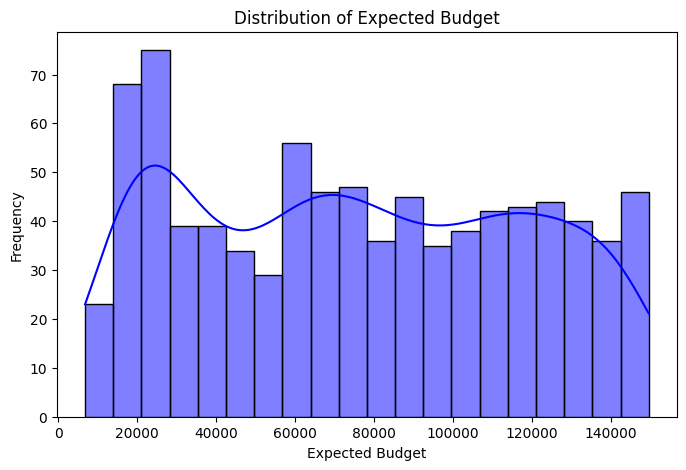

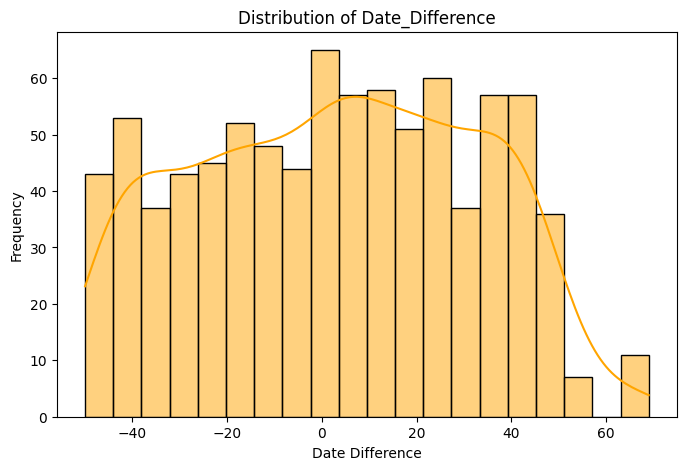

In [2]:
# Step 1: Load and Inspect the Dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure plots appear inline in the notebook
%matplotlib inline

# 1. Load the Dataset
data_path = "../data/Software Projects Data from Medium-Sized IT Companies.csv"  # Update path if needed
df = pd.read_csv(data_path)

# 2. Inspect the Dataset
print("Preview of the dataset:")
display(df.head())

print("\nDataset Information:")
df.info()

print("\nMissing Values:")
missing_values = df.isnull().sum()
print(missing_values)

print("\nSummary Statistics:")
display(df.describe())

# 3. Save Basic Analysis Results (Optional)
output_path = "../results/analysis_charts/"
import os
os.makedirs(output_path, exist_ok=True)

missing_values.to_csv(os.path.join(output_path, "missing_values.csv"), index=True)
df.describe().to_csv(os.path.join(output_path, "descriptive_stats.csv"))

# 4. Visualize Target Variable Distributions
plt.figure(figsize=(8, 5))
sns.histplot(df["Expected Budget"], kde=True, bins=20, color="blue")
plt.title("Distribution of Expected Budget")
plt.xlabel("Expected Budget")
plt.ylabel("Frequency")
plt.savefig(os.path.join(output_path, "expected_budget_distribution.png"))
plt.show()

plt.figure(figsize=(8, 5))
sns.histplot(df["Date_Difference"], kde=True, bins=20, color="orange")
plt.title("Distribution of Date_Difference")
plt.xlabel("Date Difference")
plt.ylabel("Frequency")
plt.savefig(os.path.join(output_path, "date_difference_distribution.png"))
plt.show()


In [3]:
from sklearn.preprocessing import StandardScaler

# Step 2: Data Preprocessing

# 1. Handle Negative Values in Date_Difference (if they are relevant)
# Option 1: Keep them if early delivery is important
# Option 2: Shift values to positive scale (if required)
df["Date_Difference"] = df["Date_Difference"] - df["Date_Difference"].min()  # Shift to positive

# 2. Standardize Numerical Features
scaler = StandardScaler()
numerical_features = ["Expected Team Size", "Expected Budget", "Date_Difference"]
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# 3. Encode Risk as a Categorical Feature
df["Risk"] = df["Risk"].astype("category")

# 4. Check Preprocessed Data
print("\nPreprocessed Dataset:")
display(df.head())

# Save the Preprocessed Dataset (Optional)
preprocessed_path = "../data/preprocessed_dataset.csv"
df.to_csv(preprocessed_path, index=False)



Preprocessed Dataset:


,Domain,Mobile,Desktop,Web,IoT,Date_Difference,Expected Team Size,Expected Budget,Risk
0,1,1,1,1,0,-0.437149,1.554391,0.605574,1
1,1,1,1,1,0,0.585359,0.070819,-0.507538,3
2,1,1,1,1,0,-0.096313,1.257677,0.570827,1
3,1,1,1,1,0,0.244523,0.664248,0.307227,2
4,1,1,1,0,0,1.164781,-0.819325,-0.483575,3


In [4]:
from sklearn.model_selection import train_test_split

# Step 3: Feature Selection and Data Splitting

# 1. Define Features (X) and Targets (y)
# Features: Exclude target columns
X = df.drop(columns=["Expected Budget", "Date_Difference", "Risk"])  # Drop targets
y_budget = df["Expected Budget"]  # Target 1: Budget Prediction
y_timeline = df["Date_Difference"]  # Target 2: Timeline Prediction

# 2. Split Data into Training and Testing Sets
# 80% training, 20% testing
X_train, X_test, y_budget_train, y_budget_test = train_test_split(
    X, y_budget, test_size=0.2, random_state=42
)
_, _, y_timeline_train, y_timeline_test = train_test_split(
    X, y_timeline, test_size=0.2, random_state=42
)

# 3. Verify Splits
print("Training Data Shape:", X_train.shape)
print("Testing Data Shape:", X_test.shape)
print("\nFirst few rows of training features:")
display(X_train.head())

# Save Split Data (Optional)
train_data_path = "../data/train_data.csv"
test_data_path = "../data/test_data.csv"
X_train.to_csv(train_data_path, index=False)
X_test.to_csv(test_data_path, index=False)


Training Data Shape: (688, 6)
Testing Data Shape: (173, 6)

First few rows of training features:


,Domain,Mobile,Desktop,Web,IoT,Expected Team Size
192,2,1,0,1,1,0.070819
155,2,0,0,1,0,-0.967682
319,3,1,0,0,0,1.257677
101,1,1,1,0,0,-0.670968
368,3,1,1,1,0,0.070819


In [5]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Step 4: Model Training and Evaluation

# Function to train a model and evaluate performance
def train_and_evaluate_model(X_train, X_test, y_train, y_test, target_name="Target"):
    # Initialize Random Forest Regressor
    model = RandomForestRegressor(random_state=42, n_estimators=100)
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    predictions = model.predict(X_test)
    
    # Evaluate the model
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    
    # Print evaluation metrics
    print(f"\n{target_name} Prediction - Model Performance:")
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"R-Squared (R²): {r2}")
    
    return model, predictions

# 1. Train and Evaluate for Budget Prediction
budget_model, budget_predictions = train_and_evaluate_model(
    X_train, X_test, y_budget_train, y_budget_test, target_name="Budget"
)

# 2. Train and Evaluate for Timeline Prediction
timeline_model, timeline_predictions = train_and_evaluate_model(
    X_train, X_test, y_timeline_train, y_timeline_test, target_name="Timeline"
)

# Save Models (Optional)
import joblib
model_path = "../models/"
import os
os.makedirs(model_path, exist_ok=True)
joblib.dump(budget_model, model_path + "budget_model.pkl")
joblib.dump(timeline_model, model_path + "timeline_model.pkl")

print("\nModels saved successfully!")



Budget Prediction - Model Performance:
Mean Absolute Error (MAE): 0.7351958763932446
Mean Squared Error (MSE): 0.8495181698990155
R-Squared (R²): 0.13976618618766035

Timeline Prediction - Model Performance:
Mean Absolute Error (MAE): 0.8292921431001264
Mean Squared Error (MSE): 1.0845185831795527
R-Squared (R²): -0.07789538459897338

Models saved successfully!


In [6]:
from sklearn.model_selection import GridSearchCV

# Function for Hyperparameter Tuning
def tune_model(X_train, y_train, target_name="Target"):
    print(f"\nTuning Random Forest for {target_name}...")
    param_grid = {
        "n_estimators": [100, 200, 300],
        "max_depth": [None, 10, 20, 30],
        "min_samples_split": [2, 5, 10],
        "min_samples_leaf": [1, 2, 4],
    }
    grid_search = GridSearchCV(
        RandomForestRegressor(random_state=42),
        param_grid,
        scoring="neg_mean_absolute_error",
        cv=3,
        n_jobs=-1,
        verbose=1,
    )
    grid_search.fit(X_train, y_train)
    print(f"Best parameters for {target_name}:", grid_search.best_params_)
    return grid_search.best_estimator_

# 1. Tune Budget Prediction Model
budget_model_tuned = tune_model(X_train, y_budget_train, target_name="Budget")
budget_tuned_predictions = budget_model_tuned.predict(X_test)

# Evaluate Tuned Budget Model
print("\nEvaluating Tuned Budget Model:")
train_and_evaluate_model(X_train, X_test, y_budget_train, y_budget_test, target_name="Tuned Budget")

# 2. Tune Timeline Prediction Model
timeline_model_tuned = tune_model(X_train, y_timeline_train, target_name="Timeline")
timeline_tuned_predictions = timeline_model_tuned.predict(X_test)

# Evaluate Tuned Timeline Model
print("\nEvaluating Tuned Timeline Model:")
train_and_evaluate_model(X_train, X_test, y_timeline_train, y_timeline_test, target_name="Tuned Timeline")

# Save Tuned Models (Optional)
joblib.dump(budget_model_tuned, model_path + "budget_model_tuned.pkl")
joblib.dump(timeline_model_tuned, model_path + "timeline_model_tuned.pkl")



Tuning Random Forest for Budget...
Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best parameters for Budget: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}

Evaluating Tuned Budget Model:

Tuned Budget Prediction - Model Performance:
Mean Absolute Error (MAE): 0.7351958763932446
Mean Squared Error (MSE): 0.8495181698990155
R-Squared (R²): 0.13976618618766035

Tuning Random Forest for Timeline...
Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best parameters for Timeline: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}

Evaluating Tuned Timeline Model:

Tuned Timeline Prediction - Model Performance:
Mean Absolute Error (MAE): 0.8292921431001264
Mean Squared Error (MSE): 1.0845185831795527
R-Squared (R²): -0.07789538459897338


['../models/timeline_model_tuned.pkl']

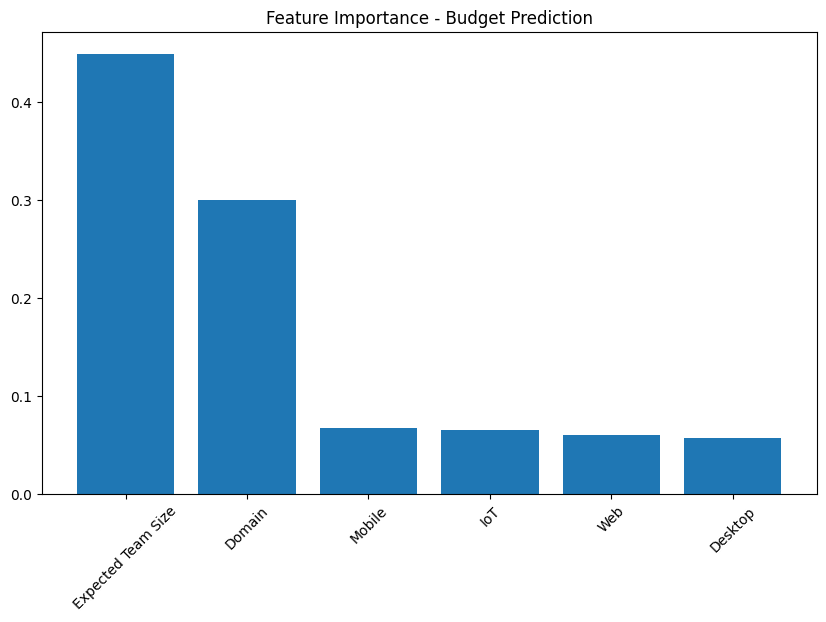

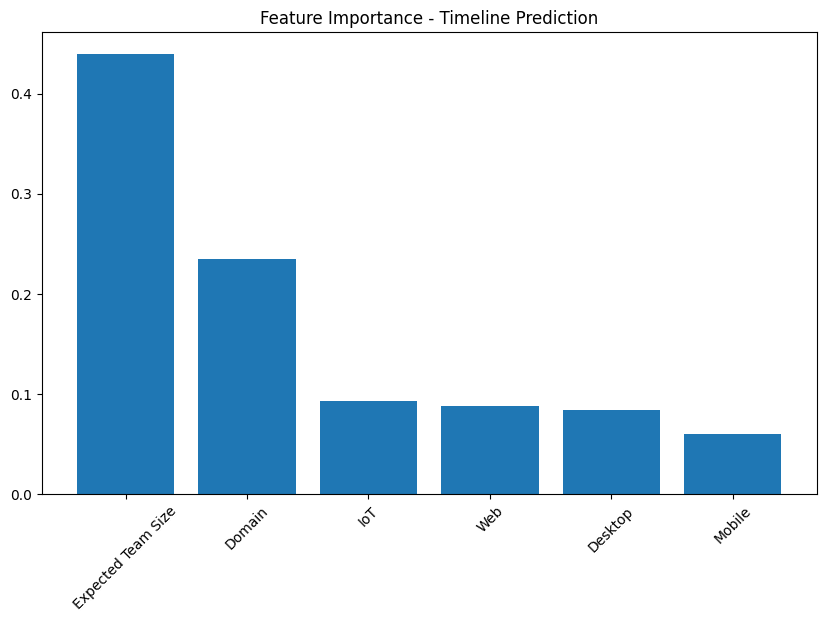

In [7]:
# Step 6: Feature Importance Analysis
import numpy as np

# Function to plot feature importance
def plot_feature_importance(model, feature_names, title):
    importance = model.feature_importances_
    sorted_idx = np.argsort(importance)[::-1]
    plt.figure(figsize=(10, 6))
    plt.bar(range(len(feature_names)), importance[sorted_idx], align="center")
    plt.xticks(range(len(feature_names)), np.array(feature_names)[sorted_idx], rotation=45)
    plt.title(title)
    plt.show()

# Plot for Budget Model
plot_feature_importance(budget_model_tuned, X_train.columns, "Feature Importance - Budget Prediction")

# Plot for Timeline Model
plot_feature_importance(timeline_model_tuned, X_train.columns, "Feature Importance - Timeline Prediction")


In [8]:
# Step 7: Feature Engineering

# 1. Add a Complexity Metric
df["Complexity"] = df["Domain"] + df[["Mobile", "Desktop", "Web", "IoT"]].sum(axis=1)

# 2. Add a Team Efficiency Metric
df["Team Efficiency"] = df["Expected Budget"] / (df["Expected Team Size"] + 1e-6)  # Avoid division by zero

# 3. Verify New Features
print("\nFeature-Engineered Dataset:")
display(df.head())

# Save the updated dataset (Optional)
engineered_path = "../data/feature_engineered_dataset.csv"
df.to_csv(engineered_path, index=False)



Feature-Engineered Dataset:


,Domain,Mobile,Desktop,Web,IoT,Date_Difference,Expected Team Size,Expected Budget,Risk,Complexity,Team Efficiency
0,1,1,1,1,0,-0.437149,1.554391,0.605574,1,4,0.389589
1,1,1,1,1,0,0.585359,0.070819,-0.507538,3,4,-7.166635
2,1,1,1,1,0,-0.096313,1.257677,0.570827,1,4,0.453874
3,1,1,1,1,0,0.244523,0.664248,0.307227,2,4,0.462518
4,1,1,1,0,0,1.164781,-0.819325,-0.483575,3,3,0.590212


In [9]:
# Step 8: Re-Training with Enhanced Features

# 1. Update Feature Selection
# Include new features: Complexity and Team Efficiency
X = df[["Domain", "Mobile", "Desktop", "Web", "IoT", "Expected Team Size", "Complexity", "Team Efficiency"]]

# Split data again with the new features
X_train, X_test, y_budget_train, y_budget_test = train_test_split(
    X, y_budget, test_size=0.2, random_state=42
)
_, _, y_timeline_train, y_timeline_test = train_test_split(
    X, y_timeline, test_size=0.2, random_state=42
)

# 2. Train and Evaluate Budget Model
print("\nRe-Training Budget Prediction Model:")
budget_model_enhanced, budget_predictions_enhanced = train_and_evaluate_model(
    X_train, X_test, y_budget_train, y_budget_test, target_name="Enhanced Budget"
)

# 3. Train and Evaluate Timeline Model
print("\nRe-Training Timeline Prediction Model:")
timeline_model_enhanced, timeline_predictions_enhanced = train_and_evaluate_model(
    X_train, X_test, y_timeline_train, y_timeline_test, target_name="Enhanced Timeline"
)

# Save Enhanced Models (Optional)
joblib.dump(budget_model_enhanced, model_path + "budget_model_enhanced.pkl")
joblib.dump(timeline_model_enhanced, model_path + "timeline_model_enhanced.pkl")



Re-Training Budget Prediction Model:

Enhanced Budget Prediction - Model Performance:
Mean Absolute Error (MAE): 0.09293960871142165
Mean Squared Error (MSE): 0.020718359111537375
R-Squared (R²): 0.9790203038546308

Re-Training Timeline Prediction Model:

Enhanced Timeline Prediction - Model Performance:
Mean Absolute Error (MAE): 0.7838955217612559
Mean Squared Error (MSE): 0.9723929668190712
R-Squared (R²): 0.03354547611541481


['../models/timeline_model_enhanced.pkl']

In [10]:
# Step 9: Final Deployment Pipeline

# Function to make predictions using the saved models
def load_and_predict(model_path, input_data):
    # Load the model
    model = joblib.load(model_path)
    # Make predictions
    predictions = model.predict(input_data)
    return predictions

# Example: Using the Budget Model for Prediction
sample_input = X_test.iloc[:5]  # Take 5 samples from the test set
print("\nSample Input for Prediction:")
display(sample_input)

# Predict Budget
budget_model_path = "../models/budget_model_enhanced.pkl"
budget_predictions = load_and_predict(budget_model_path, sample_input)
print("\nPredicted Budgets:")
print(budget_predictions)

# Predict Timeline
timeline_model_path = "../models/timeline_model_enhanced.pkl"
timeline_predictions = load_and_predict(timeline_model_path, sample_input)
print("\nPredicted Timelines:")
print(timeline_predictions)




Sample Input for Prediction:


,Domain,Mobile,Desktop,Web,IoT,Expected Team Size,Complexity,Team Efficiency
714,4,1,1,0,1,-1.116039,7,-0.503317
605,4,1,1,0,1,-1.116039,7,-0.221259
120,2,0,1,0,1,1.851106,4,0.041821
208,2,1,0,0,1,-0.374253,4,-3.459107
380,3,1,0,1,0,-0.225896,5,4.423301



Predicted Budgets:
[ 0.48484897  0.22870484  0.06901355  1.25274386 -0.75679507]

Predicted Timelines:
[ 0.14499905  0.36211167 -0.14232581 -0.47975358 -0.10312965]


In [11]:
# Transform predictions back to the original scale
# Ensure you have access to the original scaler used during preprocessing
budget_scaler = scaler  # Replace 'scaler' with the actual scaler object used for budget
timeline_scaler = scaler  # Replace 'scaler' with the actual scaler object used for timeline

# Inverse transform for budgets
original_budget_predictions = budget_scaler.inverse_transform(
    budget_predictions.reshape(-1, 1)
)
print("\nOriginal Budget Predictions:")
print(original_budget_predictions)

# Inverse transform for timelines
original_timeline_predictions = timeline_scaler.inverse_transform(
    timeline_predictions.reshape(-1, 1)
)
print("\nOriginal Timeline Predictions:")
print(original_timeline_predictions)


ValueError: non-broadcastable output operand with shape (5,1) doesn't match the broadcast shape (5,3)

In [12]:
# Assuming `scaler` was used to scale the entire dataset and `numerical_features` contains the order
numerical_features = ["Expected Team Size", "Expected Budget", "Date_Difference"]  # Update this if needed

# Isolate the scaler's parameters for "Expected Budget"
budget_mean = scaler.mean_[numerical_features.index("Expected Budget")]
budget_scale = scaler.scale_[numerical_features.index("Expected Budget")]

# Transform predictions back to the original scale
original_budget_predictions = (budget_predictions * budget_scale) + budget_mean
print("\nOriginal Budget Predictions:")
print(original_budget_predictions)

# Similarly, for "Date_Difference"
timeline_mean = scaler.mean_[numerical_features.index("Date_Difference")]
timeline_scale = scaler.scale_[numerical_features.index("Date_Difference")]


original_timeline_predictions = (timeline_predictions * timeline_scale) + timeline_mean
print("\nOriginal Timeline Predictions:")
print(original_timeline_predictions)



Original Budget Predictions:
[ 96412.15  85723.3   79059.41 128456.27  44598.56]

Original Timeline Predictions:
[57.08 63.45 48.65 38.75 49.8 ]
